In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import sklearn as sk
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

#KERAS
from keras.models  import Sequential, K
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

Class 0: 158
Class 1: 22
Proportion: 7.1818 : 1


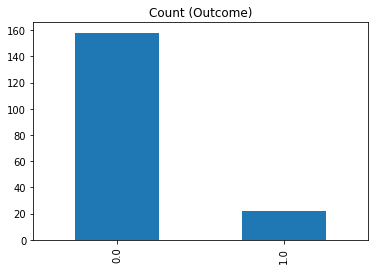

In [35]:
df = pd.read_csv('C:\\Users\\jamie\\AppData\\Desktop\\PhD\\Datasets\\MSc-Sleep-Data\\AllSubjects.csv')
df = df.drop('Date', 1)
df = df.drop('Gender', 1)

target_count = df.Outcome.value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 4), ': 1')

target_count.plot(kind='bar', title='Count (Outcome)');

In [36]:
# Class count
count_class_0, count_class_1 = df.Outcome.value_counts()

# Divide by class
df_class_0 = df[df['Outcome'] == 0]
df_class_1 = df[df['Outcome'] == 1]

Random under-sampling:
1.0    22
0.0    22
Name: Outcome, dtype: int64


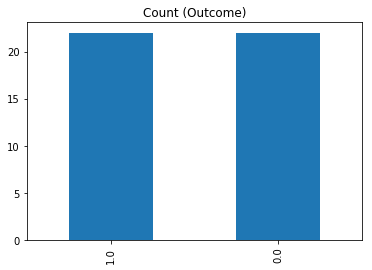

In [37]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Outcome.value_counts())

df_test_under.Outcome.value_counts().plot(kind='bar', title='Count (Outcome)');

Random over-sampling:
1.0    158
0.0    158
Name: Outcome, dtype: int64


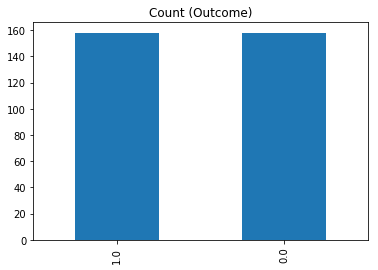

In [38]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Outcome.value_counts())

df_test_over.Outcome.value_counts().plot(kind='bar', title='Count (Outcome)');


In [39]:
#DECISION TREE WITH GINI INDEX

#first 3 attributes are used for the x-axis
X = df_test_over.values[:, 0:4]
#attributes after number 3 are used for the y-axis
Y = df_test_over.values[:,5]

#import Accuracy Score to guage performance
from sklearn.metrics import accuracy_score

#Split the dataset using 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 150)

#implement a depth of 5, with a minimum of 5 leaf nodes and a random state of 100
dt_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)

#pass the training data to the decision tree
dt_clf_gini.fit(X_train, y_train)

#make prediction using unseen test data
y_pred_gini = dt_clf_gini.predict(X_test)

#methods used to show the performance metrics of the model
print ("\nAccuracy Score for Desicion Tree Model using Gini Index is ", accuracy_score(y_test,y_pred_gini)*100 )
print("\nDesicion Tree  Classification Report\n")
print(classification_report(y_test,y_pred_gini))




Accuracy Score for Desicion Tree Model using Gini Index is  93.6842105263158

Desicion Tree  Classification Report

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        47
         1.0       0.94      0.94      0.94        48

    accuracy                           0.94        95
   macro avg       0.94      0.94      0.94        95
weighted avg       0.94      0.94      0.94        95



In [40]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix, precision_score, roc_auc_score, roc_curve, accuracy_score
precision = precision_score(y_test, y_pred_gini)
print('Precision: %f' % precision)

cm=confusion_matrix(y_test, y_pred_gini)
print('Confusion Matrix for DT: \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

precision = precision_score(y_test, y_pred_gini)
print('Precision: %f' % precision)

Precision: 0.937500
Confusion Matrix for DT: 
 [[44  3]
 [ 3 45]]
Accuracy :  0.9368421052631579
Sensitivity :  0.9361702127659575
Specificity :  0.9375
Precision: 0.937500



Logisitcal Regression AUCROC is 0.937


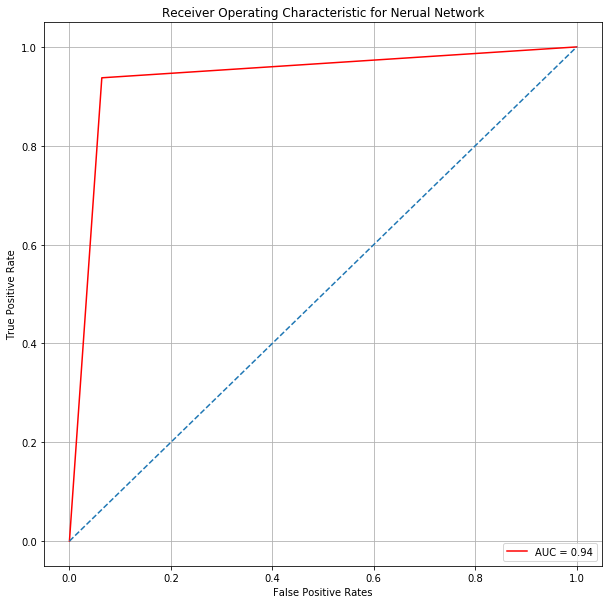

In [42]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_gini)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for Nerual Network')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rates')
plt.savefig('nnroc.png')


print('\nLogisitcal Regression AUCROC is {:.3f}'.format(roc_auc_score(y_test,y_pred_gini)))

